In [86]:
import cv2
import cv
import math
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
file = open("Points.txt", "r")
f=[]
f=file.read().split()
size=f[0]
points=[]
for i in range(1,2*int(size),2):
    points.append([f[i],f[i+1]])
    
    
points=np.array(points)
points =np.float32(points)

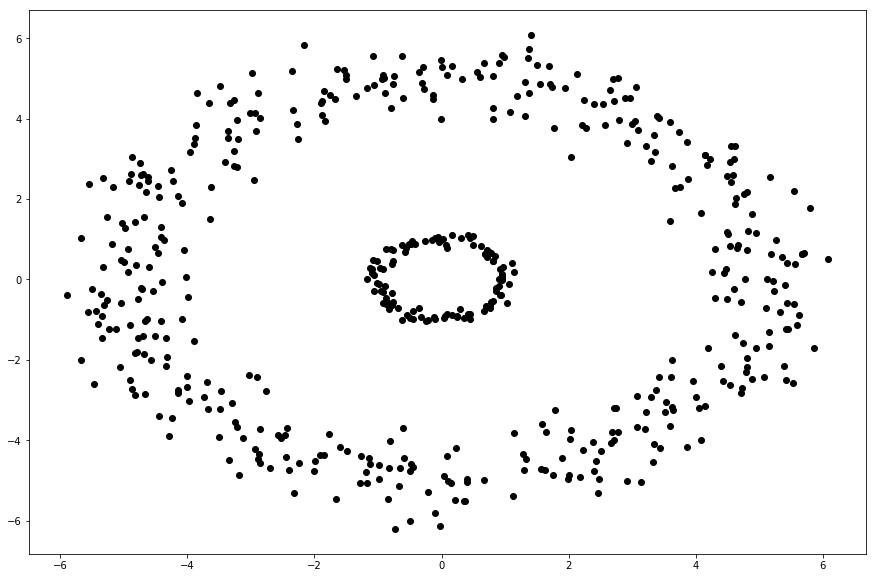

In [88]:
fig=plt.figure(figsize=(15,10))
plt.scatter(points[:,0],points[:,1],color='k')
plt.savefig('res01.jpg')
plt.show()

For using Kmeans method of cv2 we need the iteration termination criteria which specifies maximum number of iterations,  minimum accuracy in iterations and stop the iteration when any of the above condition is met.
In kmeans we will specify k (number of clusters) which in here will be 2, and samples which is our "points" field and criteria and also max number of iterations which by examining i found 10 suitable.In here i used random centers to begin.

In [89]:
# defining criteria and applying kmeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.01)
ret,label,center=cv2.kmeans(points,2,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

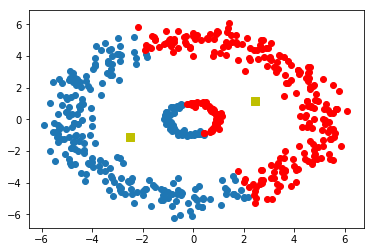

In [90]:
#separating data
A = points[label.ravel()==0]
B = points[label.ravel()==1]

#Ploting
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.savefig('res02.jpg')
plt.show()

By repeating this algorithm we'll see that the result is not always the same, and it mostly depends on the random centers that are chosen.We could lessen these differences by choosing starting centers or increase number of iterations.

In order to get a better result in another dimension,I moved these point into 3d dimension in a way that one parameter is related the distance of point from (0,0), this way we will get better random centers that can seperate points around (0,0) from point that are further.

In [91]:
points2=[]
for i in range(1,2*int(size),2):
    k=math.sqrt(float(f[i])**2 + float(f[i+1])**2)
    points2.append([f[i],f[i+1],2*k])
    
    
points2=np.array(points2)
points2=np.float32(points2)

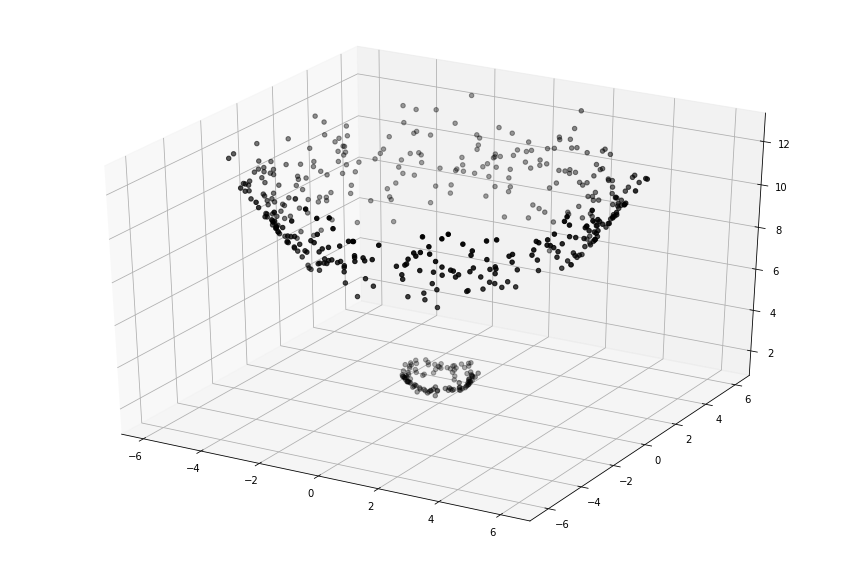

In [92]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(points2[:,0],points2[:,1],points2[:,2],color='k')
plt.show()

In [93]:
# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.01)
ret,label,center=cv2.kmeans(points2,2,criteria,10,cv2.KMEANS_RANDOM_CENTERS)


In [94]:
#separating data
A = points2[label.ravel()==0]
B = points2[label.ravel()==1]

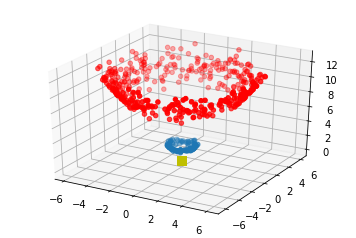

In [95]:
#plotting in 3D
ax = plt.axes(projection ="3d")
ax.scatter3D(A[:,0],A[:,1],A[:,2])
ax.scatter3D(B[:,0],B[:,1],B[:,2],c = 'r')
ax.scatter3D(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.savefig('res03-3D.jpg')
plt.show()

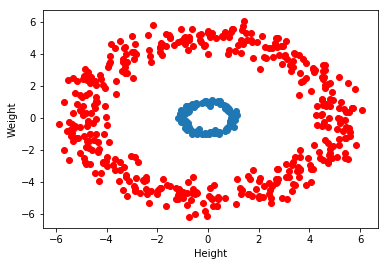

In [96]:
#ploting in 2D
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.savefig('res03.jpg')
plt.show()

We see that by changing dimension in this way we get a better result that shows 2 clusters correctly.Although this method of changing dimension may not be useful for any set of input points and it depends on them.